In [1]:
from pulp import *

## Wyndor Glass Problem
**how to maximize

- objective function:
    - Z = 3x1 + 5x2

- 2 products (x1, x2)
    - windows: 5000\$ (1hour in plant1, 3hours in plant3)
    - doors: 3000\$ (2hour in plant2, 2hours in plant3)
- 3 plants (limited capacity)
    - AL frames: 4hours
    - Wooden frames: 12hours
    - glass + assembles: 18hours
- Constraints
    - x1 <= 4
    - 2x2 <= 12
    - 3x1 + 2x2 <= 18

In [2]:
prob = LpProblem("WyndorGlass", LpMaximize)
x1 = LpVariable("Window", lowBound=0, upBound=None, cat=LpInteger)
x2 = LpVariable("Door", lowBound=0, upBound=None, cat=LpInteger)
prob += 3*x1 + 5*x2
prob += x1 <= 4
prob += 2*x2 <= 12
prob += 3*x1 + 2*x2 <= 18

In [3]:
prob.solve()
LpStatus[prob.status]

'Optimal'

In [4]:
for v in prob.variables():
    print(v.name, v.varValue)

Door 6.0
Window 2.0


In [5]:
print("Max. Total Profit:", prob.objective.value())

Max. Total Profit: 36.0


## Production Problem
**How to maximize the profit, given that:**

- Company may produce Product A and B
- Product A and B give profits, 7 and 4 respectively
- Electricity and Gas are required
    - A: 30 Electricity, 2 Gas
    - B: 20 Electricity, 1 Gas
- Available Electricity and Gas are 150 and 9 respectively

In [6]:
# define problem
prob = LpProblem("Elec Gas Problem", LpMaximize)

In [7]:
# define variables
x1 = LpVariable("Product A", lowBound=0, upBound=None, cat=LpInteger)
x2 = LpVariable("Product B", lowBound=0, upBound=None, cat=LpInteger)

In [8]:
# define objective function
prob += 7*x1 + 4*x2, "Total Profit"

In [9]:
# define constraints
prob += 30*x1 + 20*x2 <= 150, "Max Electricity"
prob += 2*x1 + 1*x2 <= 9, "Max Gas"

In [10]:
# solve
prob.solve()
LpStatus[prob.status]

'Optimal'

In [11]:
for v in prob.variables():
    print(v.name, ":", v.varValue)

Product_A : 3.0
Product_B : 3.0


In [12]:
print("Max. Total Profit:", prob.objective.value())

Max. Total Profit: 33.0


## Bus Driver Problem
**How to Minimize the number of drivers?**

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

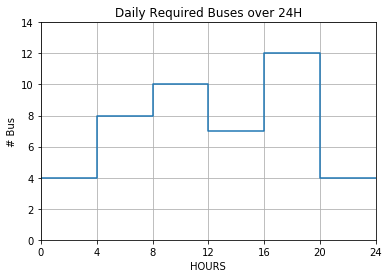

In [14]:
x = [0,4,8,12,16,20,24]
y = [4,4,8,10,7,12,4]
plt.plot(x,y,ls="steps")
plt.xlim(min(x), max(x))
plt.xticks(x)
plt.xlabel("HOURS")
plt.ylim(0,max(y)+2)
plt.ylabel("# Bus")
plt.title("Daily Required Buses over 24H")
plt.grid()

In [15]:
# Define Problem
prob = LpProblem("Bus Scheduling", LpMinimize)

In [16]:
# Define 6 variables
time_frame = x
lpvars = []
for time in time_frame[:-1]:
    x = LpVariable(name="Num of Drivers in time %s"%time,
                   lowBound=0, upBound=None,
                   cat=LpInteger)
    lpvars.append(x)
lpvars

[Num_of_Drivers_in_time_0,
 Num_of_Drivers_in_time_4,
 Num_of_Drivers_in_time_8,
 Num_of_Drivers_in_time_12,
 Num_of_Drivers_in_time_16,
 Num_of_Drivers_in_time_20]

In [17]:
# Define Objective Functions
prob += sum(lpvars), "Total Costs"

In [18]:
bus_required = y[1:]
bus_required

[4, 8, 10, 7, 12, 4]

**One the driver is placed, (s)he works for 8 hours**

In [19]:
# Define Constraints
for i, lpvar in enumerate(lpvars):
    try: # driver at time 0 and 4 must cover the requirement of time 4 
        Constraint = lpvars[i] + lpvars[i+1] >= bus_required[i+1]
    except: # driver at time 20 and 24(0) must cover the requirement of time 24(0)
        Constraint = lpvars[i] + lpvars[0] >= bus_required[0]
    prob += Constraint

In [20]:
prob

Bus Scheduling:
MINIMIZE
1*Num_of_Drivers_in_time_0 + 1*Num_of_Drivers_in_time_12 + 1*Num_of_Drivers_in_time_16 + 1*Num_of_Drivers_in_time_20 + 1*Num_of_Drivers_in_time_4 + 1*Num_of_Drivers_in_time_8 + 0
SUBJECT TO
_C1: Num_of_Drivers_in_time_0 + Num_of_Drivers_in_time_4 >= 8

_C2: Num_of_Drivers_in_time_4 + Num_of_Drivers_in_time_8 >= 10

_C3: Num_of_Drivers_in_time_12 + Num_of_Drivers_in_time_8 >= 7

_C4: Num_of_Drivers_in_time_12 + Num_of_Drivers_in_time_16 >= 12

_C5: Num_of_Drivers_in_time_16 + Num_of_Drivers_in_time_20 >= 4

_C6: Num_of_Drivers_in_time_0 + Num_of_Drivers_in_time_20 >= 4

VARIABLES
0 <= Num_of_Drivers_in_time_0 Integer
0 <= Num_of_Drivers_in_time_12 Integer
0 <= Num_of_Drivers_in_time_16 Integer
0 <= Num_of_Drivers_in_time_20 Integer
0 <= Num_of_Drivers_in_time_4 Integer
0 <= Num_of_Drivers_in_time_8 Integer

In [21]:
prob.solve()
LpStatus[prob.status]

'Optimal'

In [22]:
for v in prob.variables():
    print(v.name, ":", v.value())

Num_of_Drivers_in_time_0 : 0.0
Num_of_Drivers_in_time_12 : 12.0
Num_of_Drivers_in_time_16 : 0.0
Num_of_Drivers_in_time_20 : 4.0
Num_of_Drivers_in_time_4 : 10.0
Num_of_Drivers_in_time_8 : 0.0


In [23]:
prob.objective.value()

26.0